# Assignment 1
## Group 6
> s183930 - Nikolaj S. Povlsen

> s184208 - Steffen Holm Cordes

> s217176 - Johan Fredrik Bjørnland

## Link to Git repository
https://github.com/realnikolaj/comsocsci2022group6



## Contribution statement

We worked collaboratory as a group, main responsibles are:
Part 1: Steffen S184208  
Part 2: Steffen S184208  
Part 3: Johan   S217176  
Part 4: Nikolaj S183930

# Part 1: Datasets for Computational Social Science

### Big. How large is this data (approximately)? Could you collect the same amount of information via surveys?

We have 14715 submissions by 9375 unique authors and 644,397 comments on those submissions. It would probabaly be costly to obtain the same amount of information by surveys.

### Always-on. Can you keep collecting data over time?

The data is always-on, at least submission and comment are saved in https://files.pushshift.io, while scores will not be correctly calculated but was not here.

### Non-reactive. Is the dataset non-reactive?

The data is non-reactive, as people are probably not aware that data is used for experiments like these.

### Incomplete. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price?

The dataset does not capture all events leading to the GME stock rise. There are probably other online platforms like telegram and also the search criterion for reddit information may not capture all relevant data. Other than that market commentators, stock analysts and word of mouth are also sources of information exchange regarding the matter.

### Inaccessible. Is the data accessible? 

Reddit data is publicly accessible from PushShift API.

### Non-representative. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?

The conclusions will not be specific to the GME events, they could also tell us about the phenomena of manipulating stock prices in groups.

### Drifting. Is there any source of drift in this dataset (within the period observed)? 

Public perception of the phenomena, e.g. conveyed thorugh public news, will change the influx of users in this subreddit and investors.

### Algorithmically confounded. Is the dataset algorithmically confounded? If yes, why?

The score system will influence the type of posts, as thought provoking posts will probably get a score and comments. Some users will try to post/comment from a principle to improve ones score.

### Dirty. What aspect may make this dataset dirty?

As everyone can post/comment, there are unwanted data such as deleted comments and users, plus junk and spam.

### Sensitive. Is there any sensitive information in the data?

Usernames would not be considered sensitive, but could potentially be combined with other information, such as timestamps and crosreferencing other sites to identify the person.

# Part 2: activity on Reddit and GME prices

## Part 2.1 : Plotting prices and comments using line-graphs.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
import json
import netwulf as nw
from scipy import stats
import networkx as nx
import random
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up data
GME_marketdata = pd.read_csv('../data/GME.csv', parse_dates=['Date']).set_index('Date')
rolled_marketdata = GME_marketdata['Volume'].rolling('7D', center=True).mean()

GME_comments = pd.read_csv('../data/wallstreetbet_gamestop_comments_cleaned.csv')
GME_comments['date_of_creation'] = pd.to_datetime(GME_comments['date_of_creation'], unit='s')
GME_comments = GME_comments.sort_values('date_of_creation').set_index('date_of_creation')
GME_comments = GME_comments.loc['2020-1-1':'2021-1-25']
GME_comments['daily'] = GME_comments.rolling('1D', center=True).count()['id']
GME_comments['weekly'] = GME_comments['daily'].rolling('7D', center=True).mean()

In [3]:
# Setup matplotlib formatting
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()
myFormat = mpl.dates.DateFormatter('%b %Y')

### 1. Plot the daily volume of the GME stock over time using the GME market data. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function pd.rolling). Use a log-scale on the y-axis.

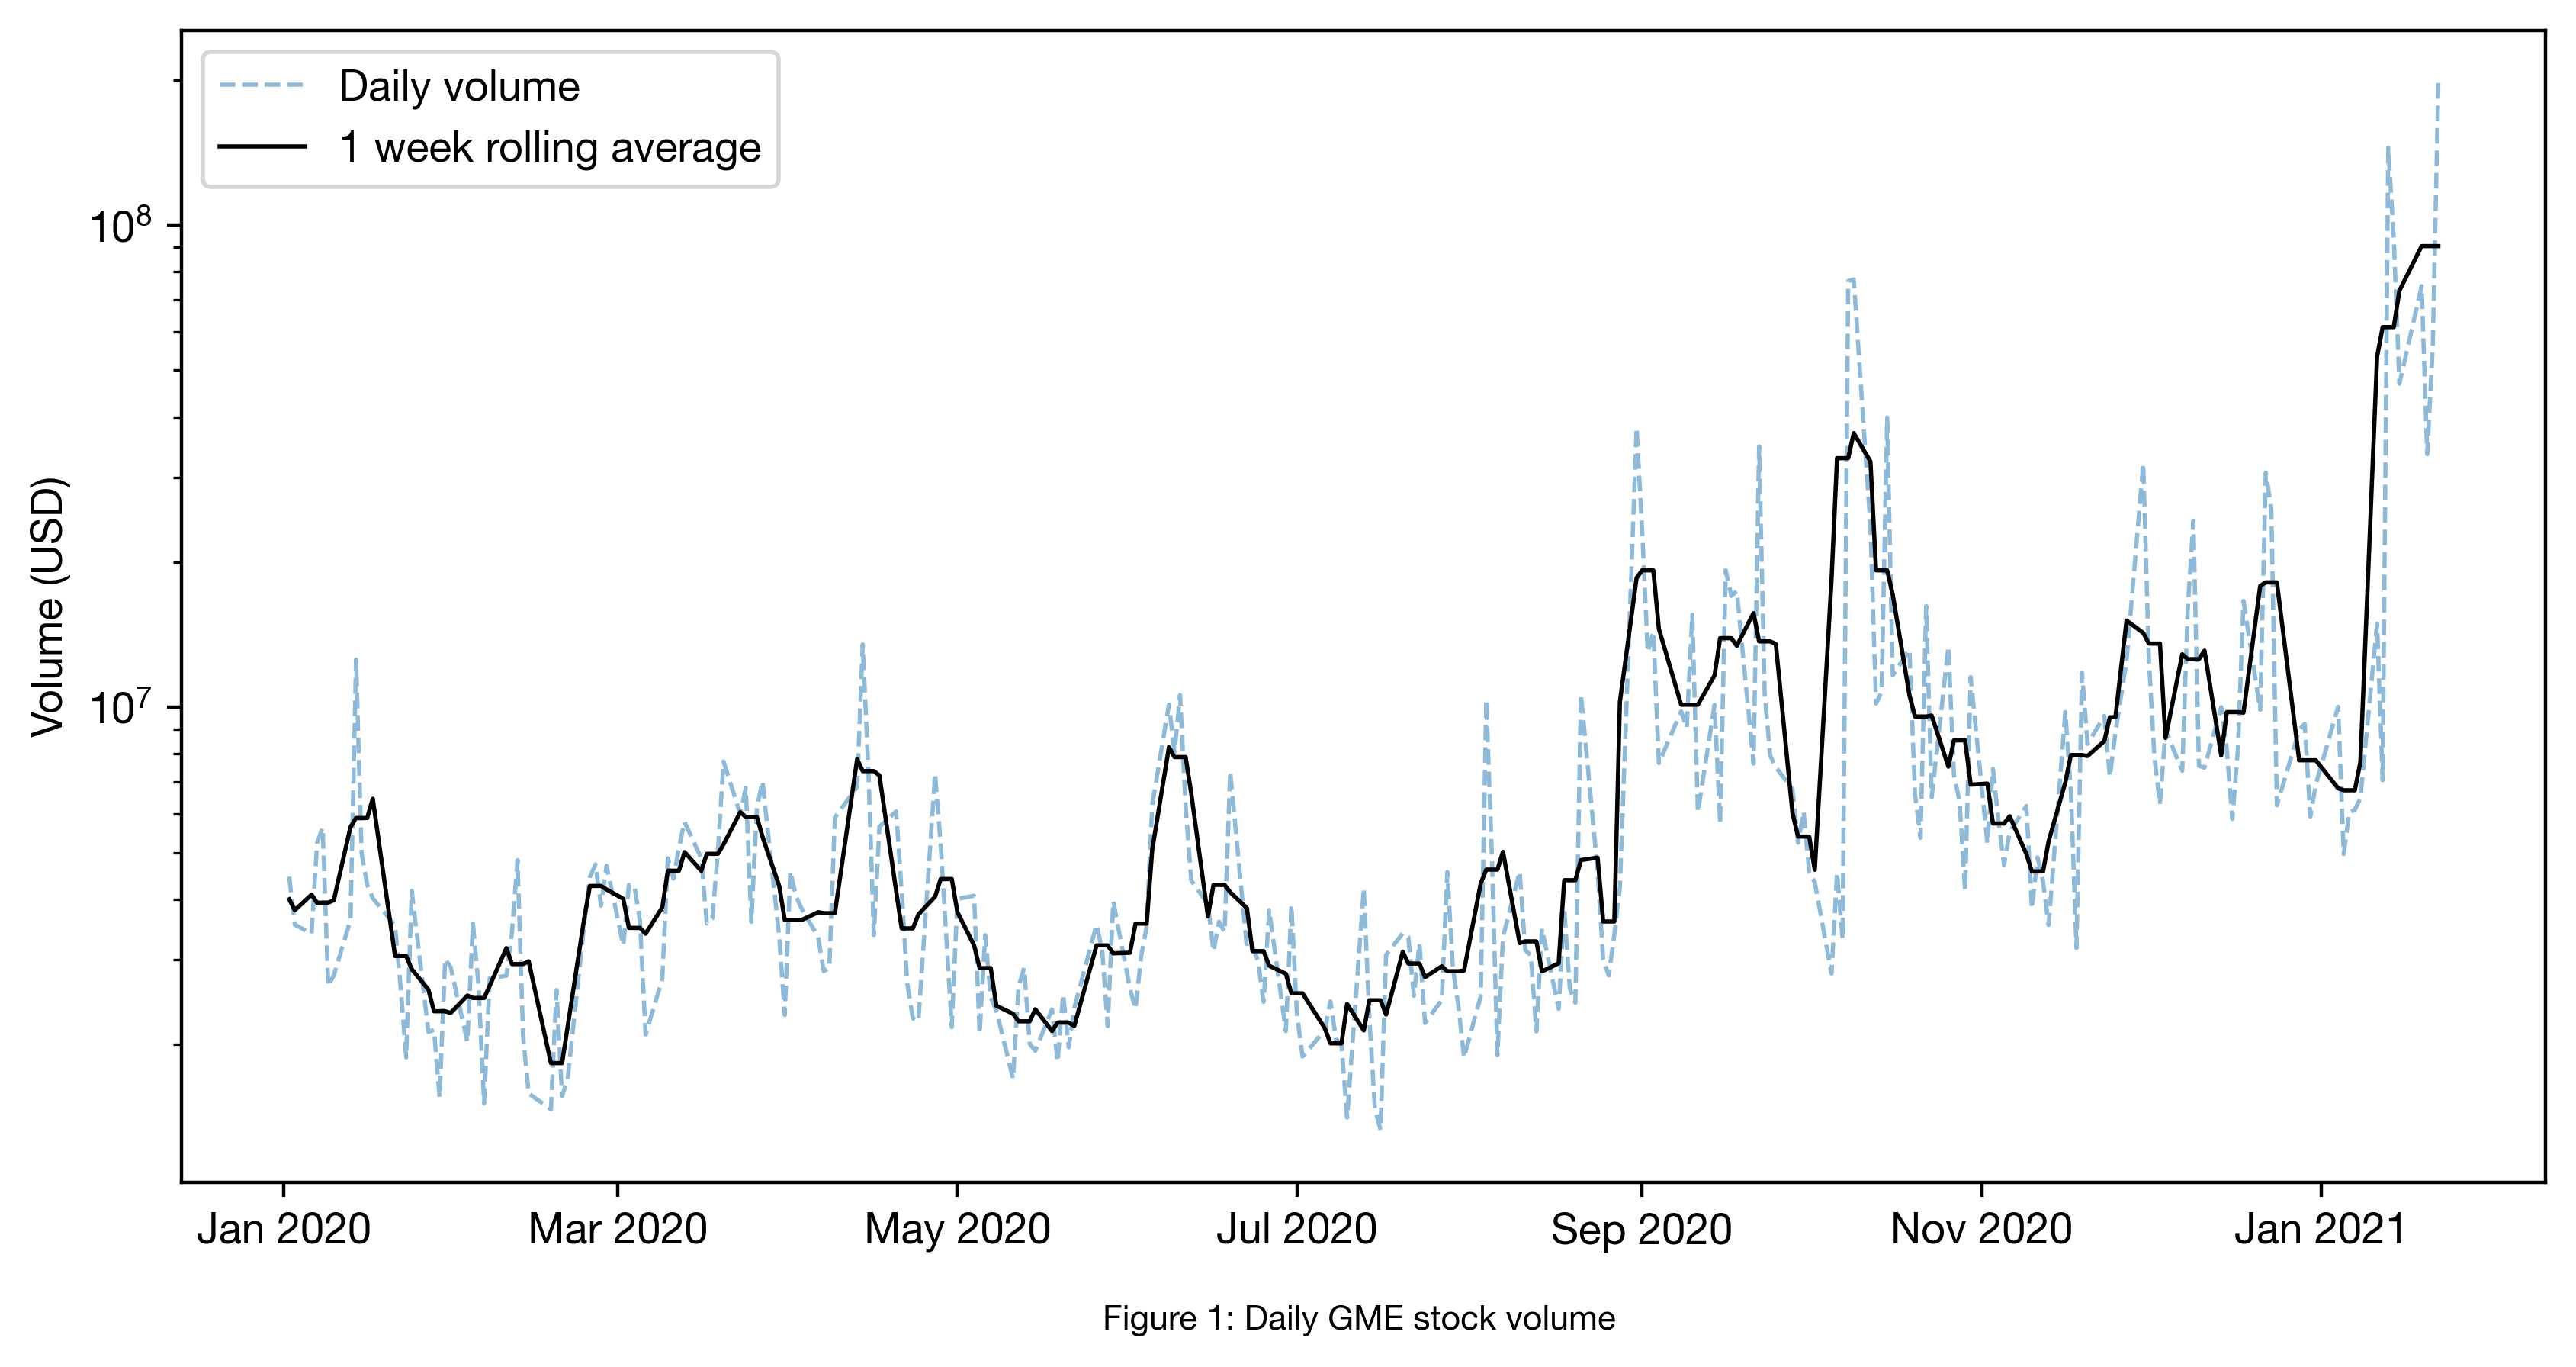

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=400)
ax.plot(GME_marketdata.index,GME_marketdata.Volume, ls = '--', alpha = 0.5, label="Daily volume")
ax.plot(rolled_marketdata.index,rolled_marketdata.values, color='black', label="1 week rolling average")
ax.set_ylabel('Volume (USD)')
ax.set_yscale('log')
ax.legend()
ax.xaxis.set_major_formatter(myFormat)
plt.title("Figure 1: Daily GME stock volume ", y=-0.15, fontsize=8)
plt.show()

### 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.

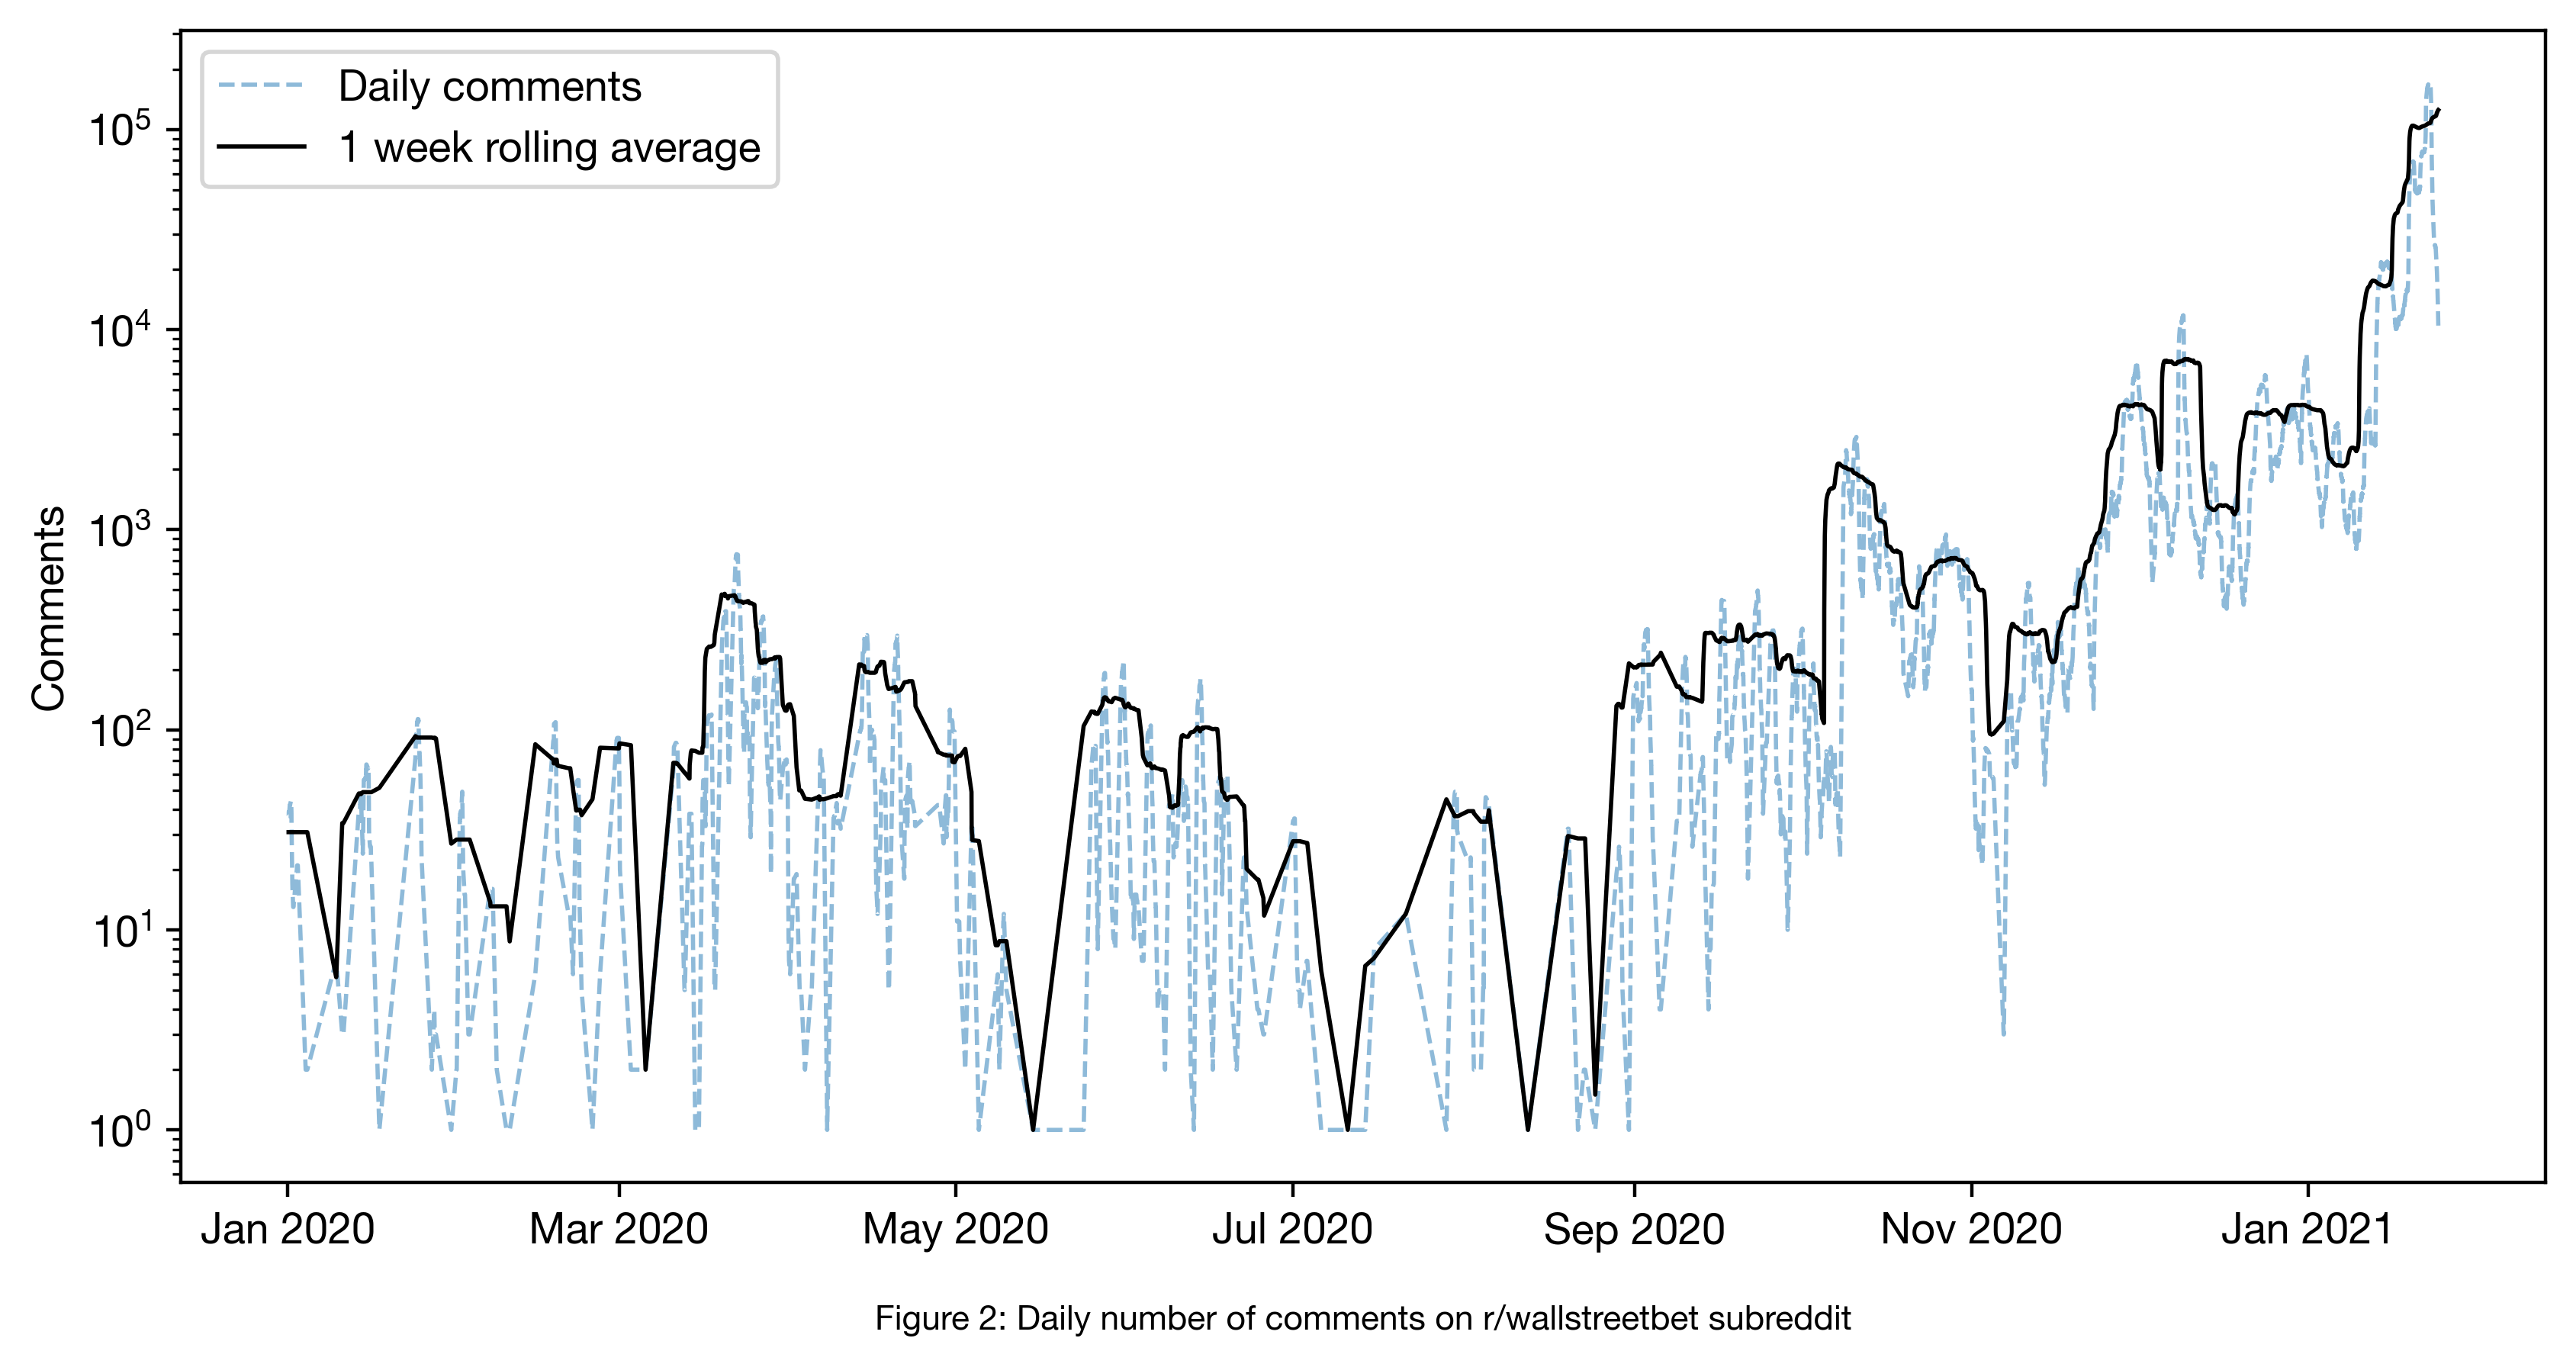

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=400)
ax.plot(GME_comments['daily'].index,GME_comments['daily'].values, ls = '--', alpha = 0.5, label="Daily comments")
ax.plot(GME_comments['weekly'].index,GME_comments['weekly'].values, color='black', label="1 week rolling average")
ax.set_ylabel('Comments')
ax.set_yscale('log')
ax.legend()
ax.xaxis.set_major_formatter(myFormat)
plt.title("Figure 2: Daily number of comments on r/wallstreetbet subreddit", y=-0.15, fontsize=8)
plt.show()

### 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?

Using a log scale on the y-axis allows us to see long term trends, ranging from very few comments in the start and the multiple orders of comments in the end of the time period. If we had used cartesian coordinates the trend of the small numbers would not be visible.
The advantage of using a rolling window, here centered on the period, smoothes the data in order to capture the overall trend of the data.

### 4. Now take a minute to look at these two figures. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

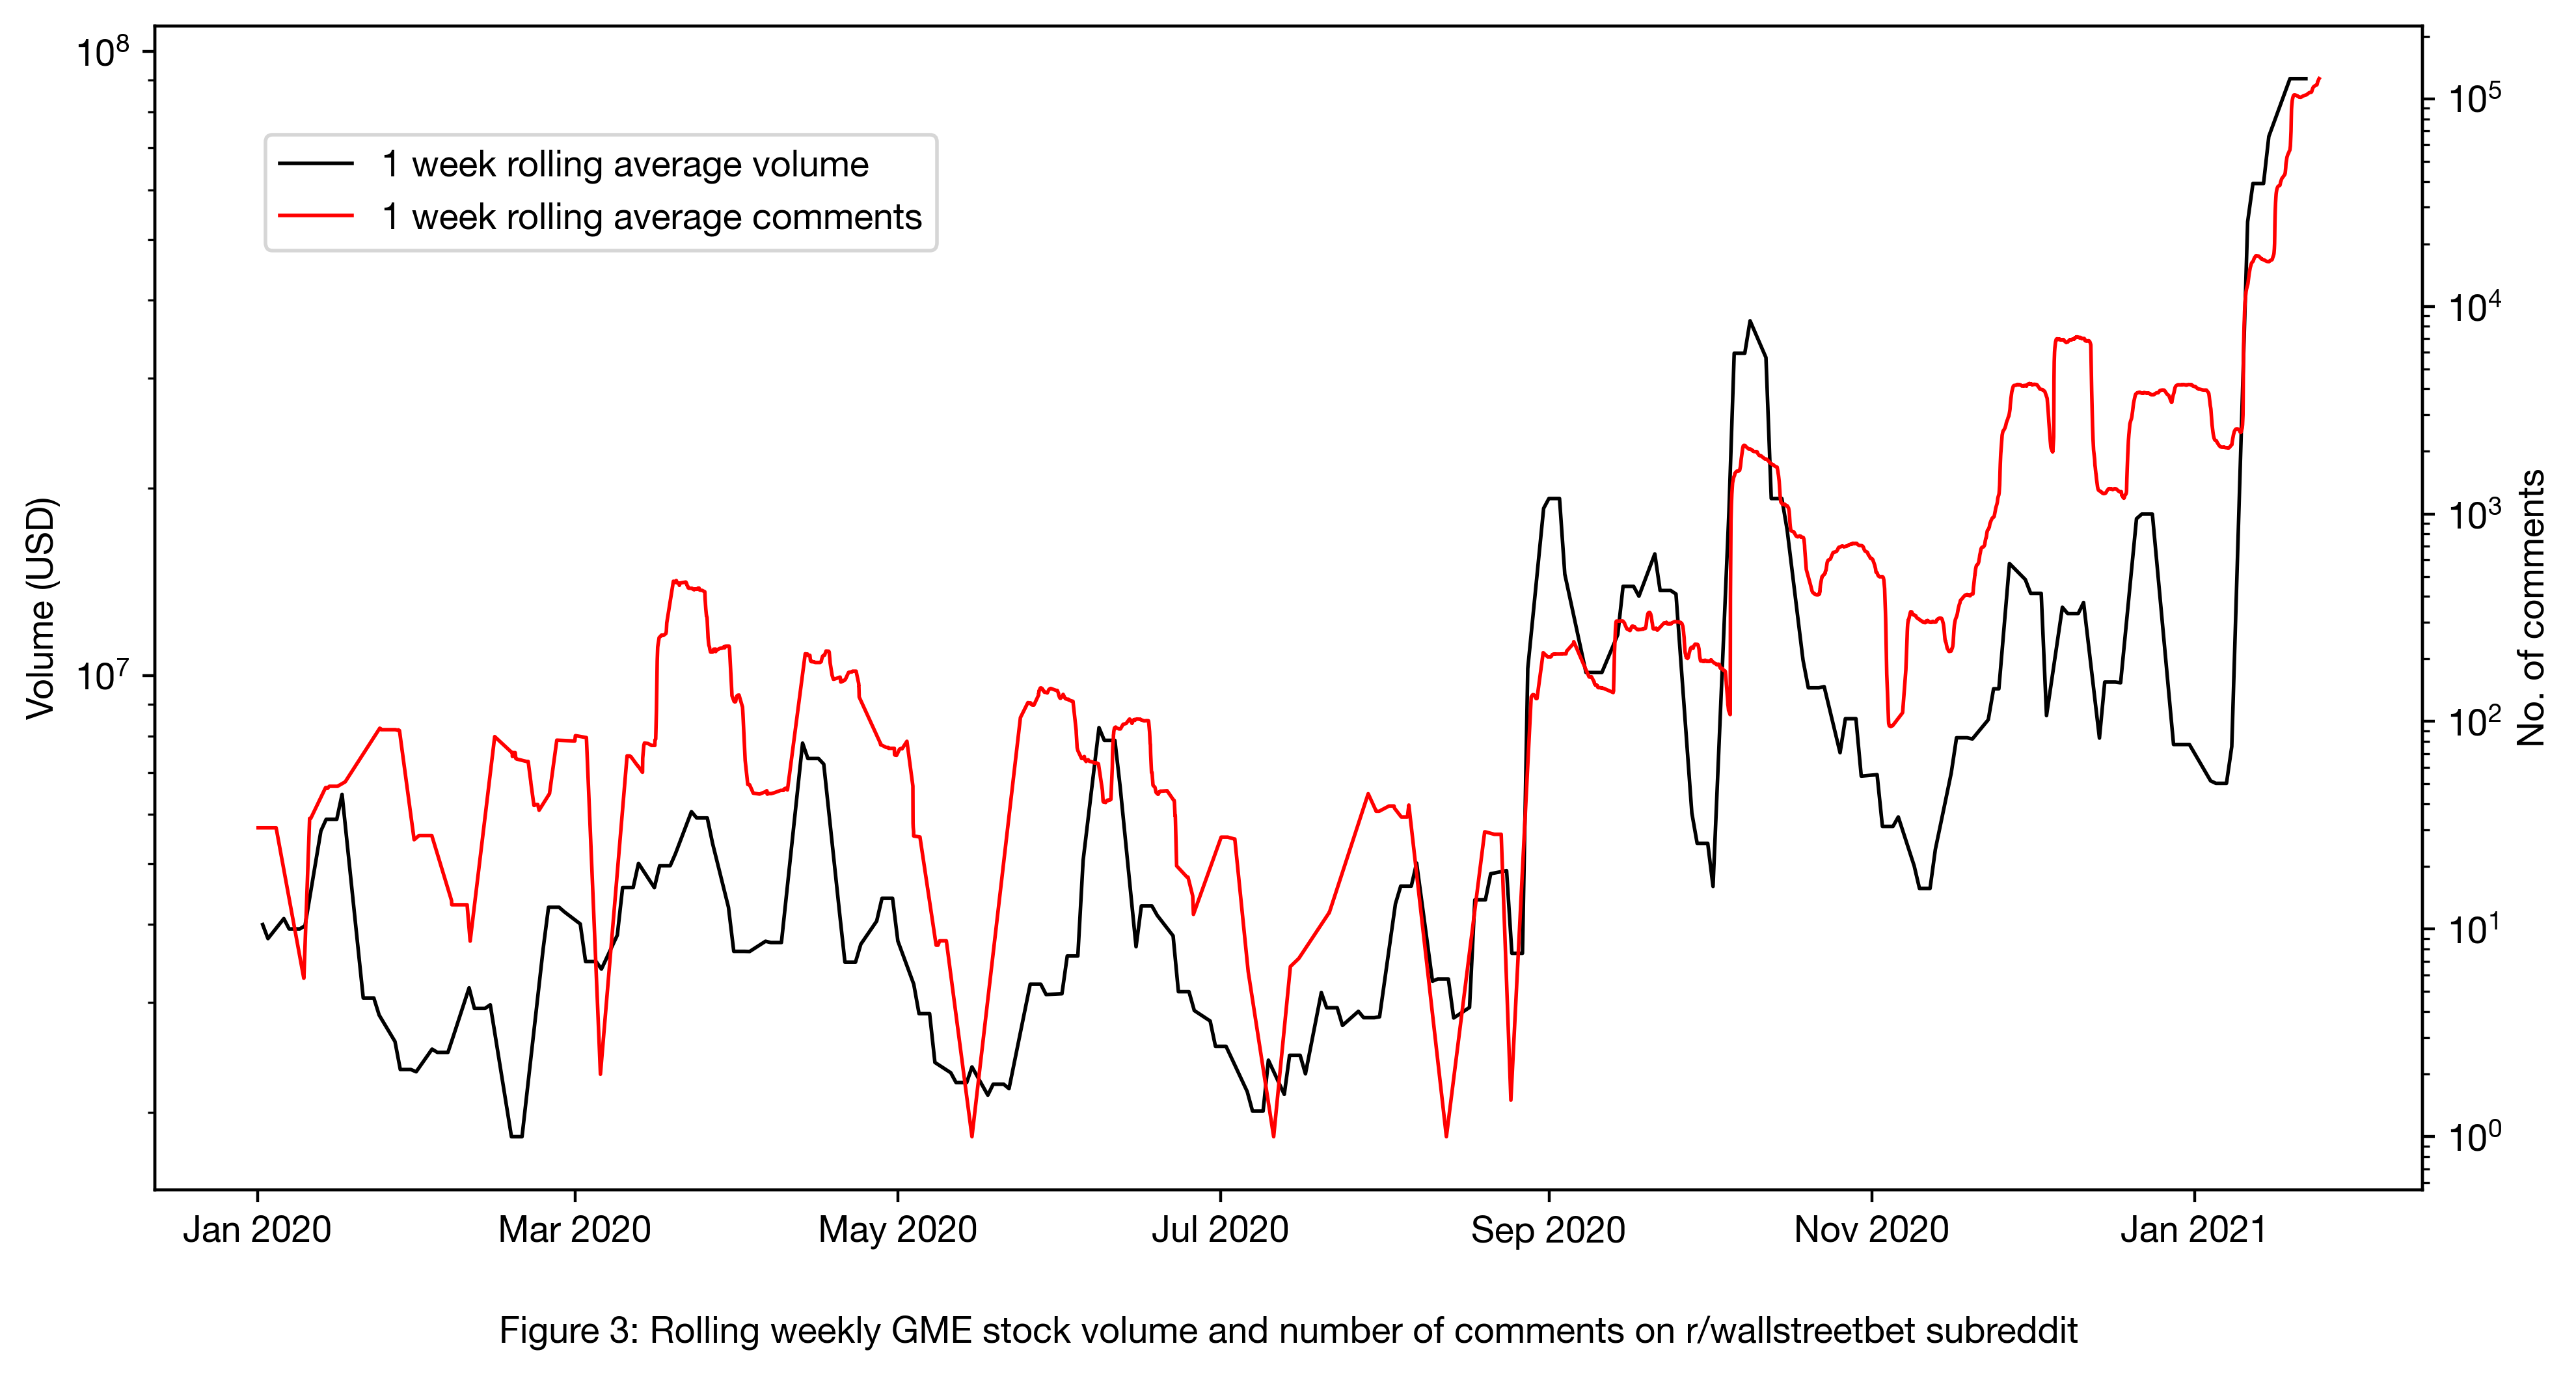

In [6]:
fig, ax = plt.subplots(figsize=(10,5), dpi=400)
ax.plot(rolled_marketdata.index,rolled_marketdata.values, color='black', label="1 week rolling average volume")
ax.set_ylabel('Volume (USD)')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(myFormat)
ax2 = ax.twinx()
ax2.plot(GME_comments['weekly'].index,GME_comments['weekly'].values, color='red', label="1 week rolling average comments")
ax2.set_ylabel('No. of comments')
ax2.set_yscale('log')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.title("Figure 3: Rolling weekly GME stock volume and number of comments on r/wallstreetbet subreddit", y=-0.15, fontsize=10)
plt.show()

Figure 3 shows the rolling weekly GME stock volume and number of comments in a dual axis chart, showing a correlation between volume and number of comments, specifically we see that when the volume goes up, we see an increase in number of comments. 
After september 2020 we see a sharp rise in the volume of trades in GME stock, also the boom and bust cycles in trade volume from september 2020 indicate a degree of speculative trading.

## Part 2.2: Returns vs number of comments using scatter-plots. In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit

### 1. & 2. Compute the daily log-returns and the daily log-change in number of new comments

In [7]:
# Resample to daily and compute log-returns and log-change in comments
log_return_comments = pd.DataFrame(np.log(GME_marketdata['Close'] / GME_marketdata['Close'].shift(1)))
daily_comments = GME_comments.resample('1D').count()['id']
daily_comments = daily_comments[daily_comments!=0]
daily_log_change = np.log(daily_comments / daily_comments.shift(1))
log_return_comments['comments'] = daily_log_change
log_return_comments.dropna(inplace=True)

### 3. Compute the correlation coefficient between the series computed in step 1 and step 2. Is the correlation statistically significant?

In [8]:
print(f" Pearson correlation coeffcient for the daily log change in comments and return:{stats.pearsonr(log_return_comments['Close'],log_return_comments['comments'])[0]:.2f}, p-value:{stats.pearsonr(log_return_comments['Close'],log_return_comments['comments'])[1]:.9f}")

 Pearson correlation coeffcient for the daily log change in comments and return:0.30, p-value:0.000012653


The Pearson correlation coefficient shows a weak positive linear relationship between daily log change and return, but the p-value = 0.00 suggests that it is statistically significant.

### 4. Make a scatterplot of the daily log-return on investment for the GME stock against the daily log-change in number of comments.

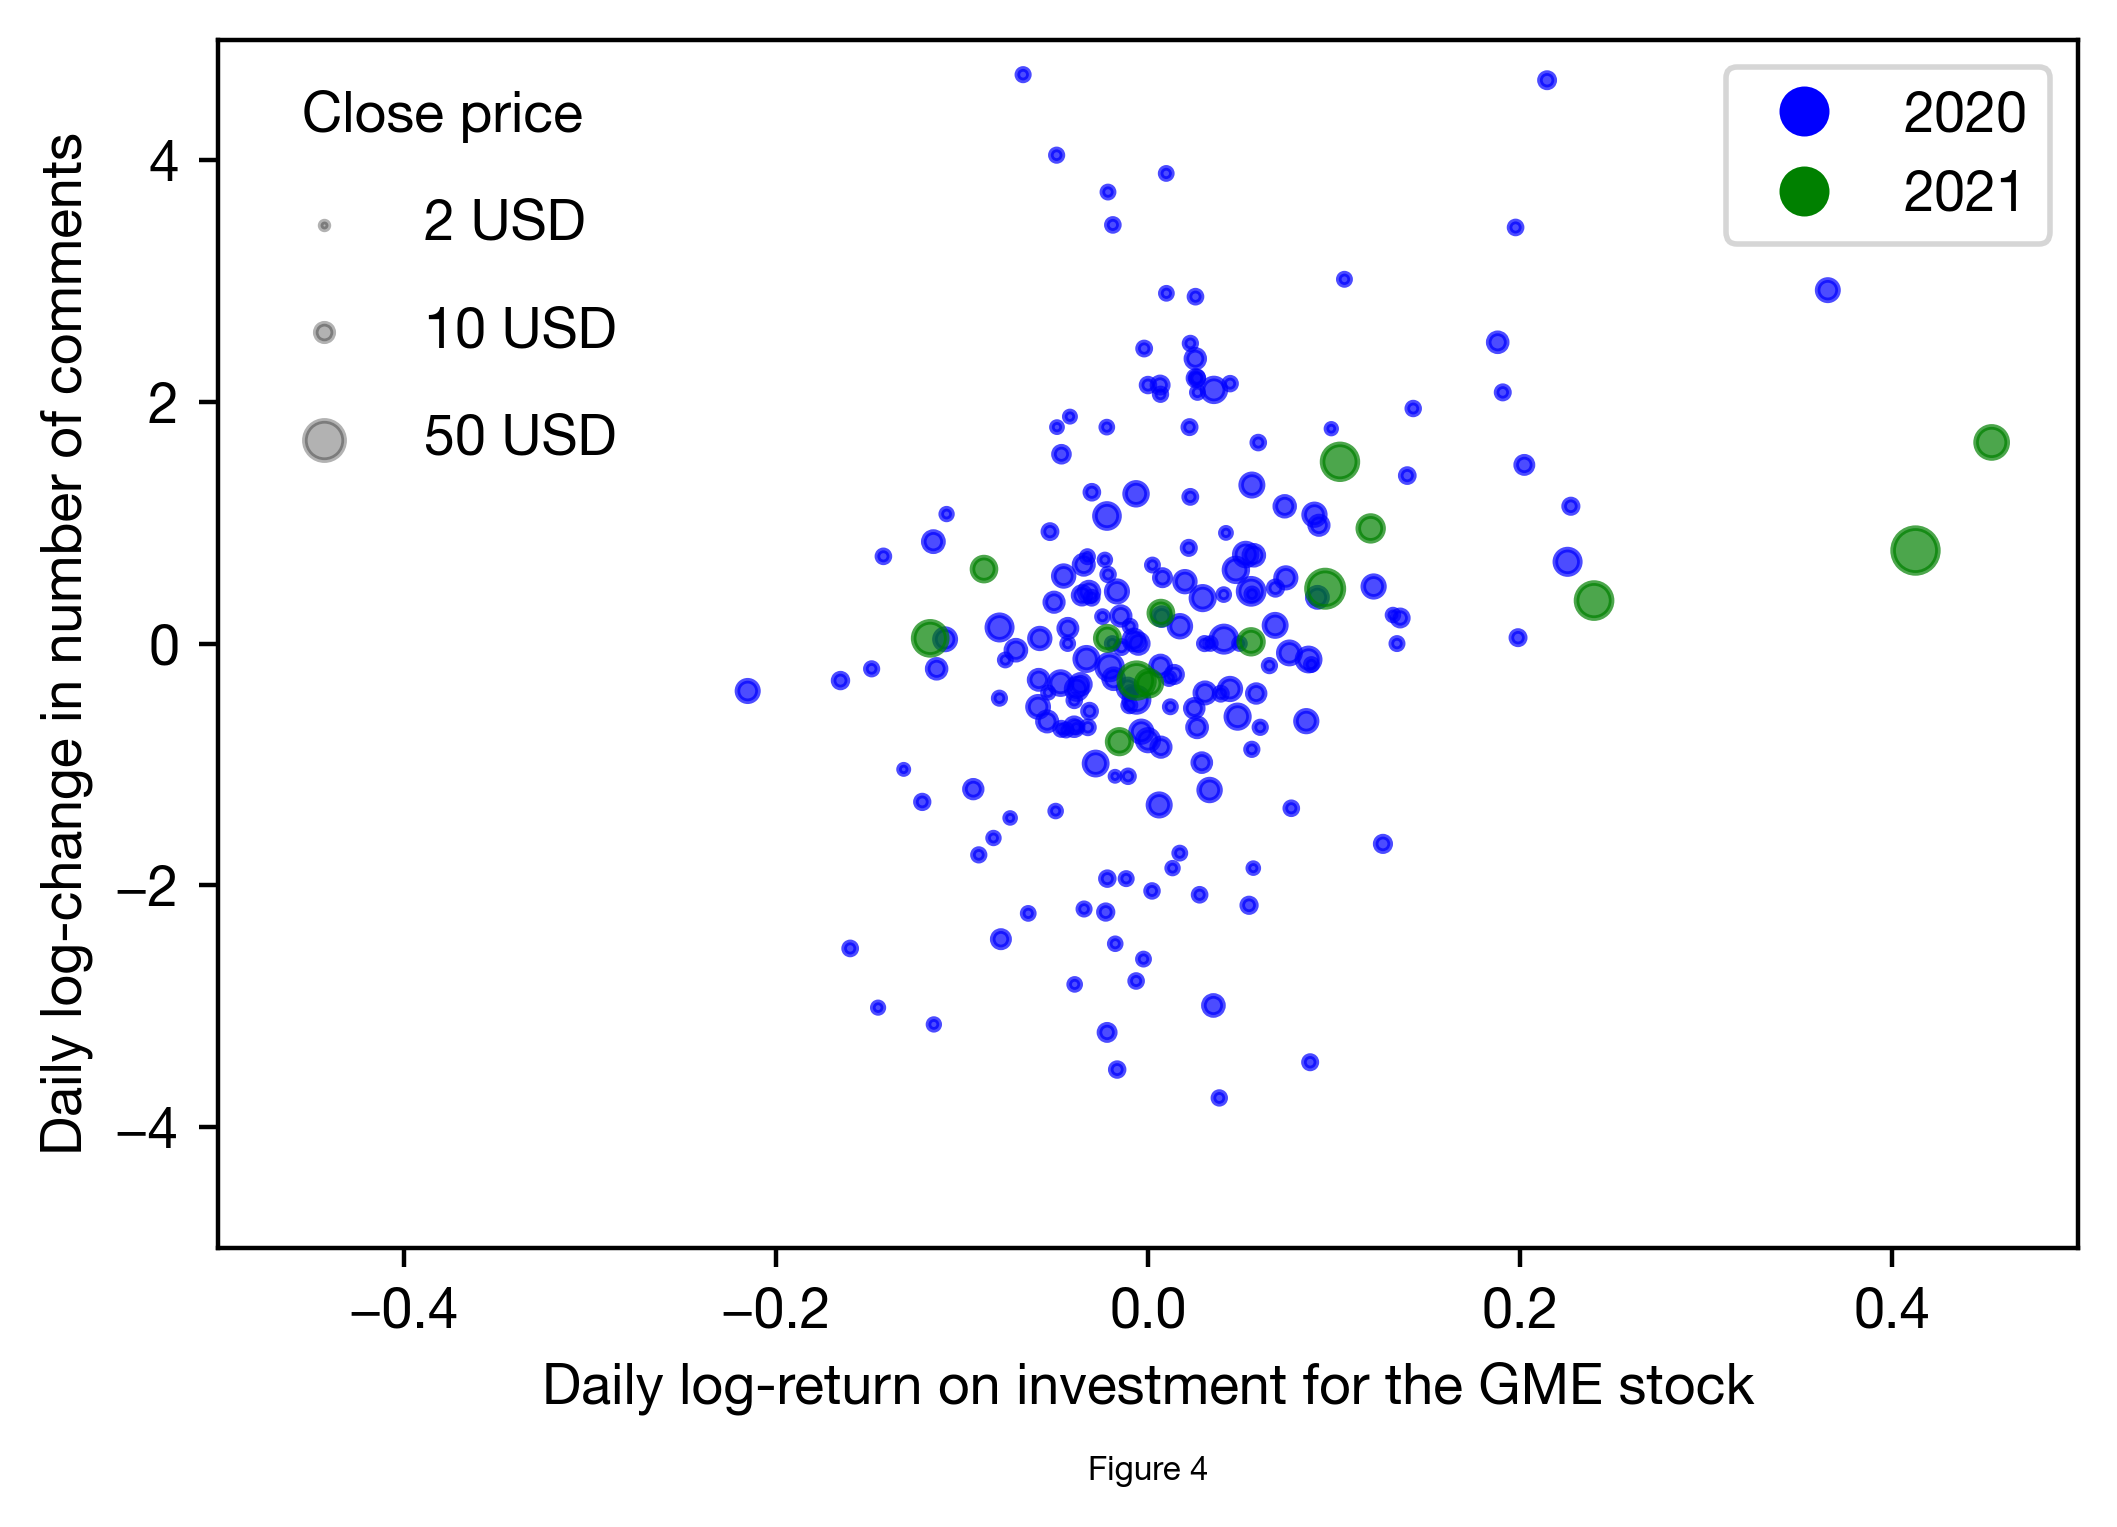

In [9]:
# Prepare data for scatterplot
log_return_comments['close_price'] = GME_marketdata['Close']
log_return_comments['color'] = 'blue'
log_return_comments['color'].loc['2021'] = 'green'

fig, ax = plt.subplots(dpi=400)
ax.scatter(log_return_comments['Close'],log_return_comments['comments'], s=log_return_comments['close_price'], c=log_return_comments['color'], alpha=0.7)
ax.set_ylabel('Daily log-change in number of comments')
ax.set_xlabel('Daily log-return on investment for the GME stock')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-5,5)

for size in [2, 10, 50]:
    plt.scatter([], [], c='k', alpha=0.3, s=size, label=str(size) +' USD')

legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Close price')
legend_elements = [mpl.lines.Line2D([0], [0], marker='o', color='w', label='2020', markerfacecolor='b', markersize=10),
                   mpl.lines.Line2D([0], [0], marker='o', color='w', label='2021', markerfacecolor='g', markersize=10)
                   ]
ax.legend(handles=legend_elements)
ax.add_artist(legend1)
plt.title("Figure 4", y=-0.22, fontsize=6)
plt.show()

### 5. Now take a minute to look at the figure you just prepared. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 

When looking at Figure 4 we see an overall correlating trend between the daily log-change in comments and log-return on  investment, specifically focusing on greater positive changes in closing price semms to positively affect change in number of comments, and vice versa. 
This trend is even more pronounced for the 2021 data where we observe a linear relationship which suggests a power law relationship, log-change in comments change by an order of magnitude compared to the daily log-return, equal to the slope of the fitted line. 
We see a greater positive log-return in 2021, than 2020.

### 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*

There is evidence of correlation between the activity on wallstreetbet and the price of the GME stock. Correlation does equal causation and a hidden confounder could be the reason for the correlation found, although it was on on the subreddit that the meme stock phenomena of 2020 began.
The activity on reddit is certainly to a degreee a result of market changes for the GME stock, but the reverse could also easily be the case.

# Part3

## Exercise 2.1 the 'Königsberg Problem

### Which of the icons in Image 2.19 can be drawn without raising yourpencil from the paper, and without drawing any line more than once? Why?

A walking path that goes through all bridges can have only one starting and one end point. Thus such a path cannot exist on a graph that has more than two nodes with an odd number of links.

Graph a) Consists of two nodes of degree 2, and two of degree three. Therefore, it does not have more than two nodes with an odd number of links, and it can be drawn be drawn without raising your pencil from the paper, and without drawing any line more than once.

Graph b) Consists of one node of degree 4, and four of degree three. Therefore, it does have more than two nodes with an odd number of links, and it can not be drawn be drawn without raising your pencil from the paper, and without drawing any line more than once.

Graph c) Consists of 6 node of degree 2, and 6 of degree 4. Therefore, it does have more than two nodes with an odd number of links, and it can be drawn be drawn without raising your pencil from the paper, and without drawing any line more than once.

Graph d) Consists of 1 node of degree 1, 2 nodes of degree 2, one of degree 3 and 2 of degree 6. Therefore, it does have more than two nodes with an odd number of links, and it can be drawn be drawn without raising your pencil from the paper, and without drawing any line more than once.

## Exercise 2.3 Graph representation

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

Construct for the networks (a) and (b) in Imade 2.20:
- Undirected graph of 6 nodes and 7 links.
- Directed graph of 6 nodes and 8 directed links.
- The corresponding adjacency matrices.
- The corresponding link lists.

In [11]:
# Undirected graph

undirected_graph = nx.Graph()
undirected_graph.add_nodes_from([1, 2, 3, 4, 5, 6])
undirected_graph.add_edges_from(
    [(1, 2), (1, 3), (1, 6), (6, 3), (3, 2), (2, 4), (1, 4)])

adjacency_matrix_undirected = nx.adjacency_matrix(undirected_graph).todense()

print("Adjacency matrix undirected:\n",adjacency_matrix_undirected)

link_list_undirected = list(undirected_graph.edges)
print("\nLinked_list undirected:\n", link_list_undirected)

Adjacency matrix undirected:
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Linked_list undirected:
 [(1, 2), (1, 3), (1, 6), (1, 4), (2, 3), (2, 4), (3, 6)]


In [12]:
directed_graph = nx.DiGraph()

directed_graph.add_nodes_from([1, 2, 3, 4, 5, 6])

directed_graph.add_edges_from(
    [(1, 2), (6, 1), (2, 3), (3, 2), (4, 1), (3, 1), (2, 4), (6, 3)])
adjacency_matrix_directed = nx.adjacency_matrix(directed_graph).todense()
link_list_directed = list(directed_graph.edges)
print("Adjacency matrix directed: \n", adjacency_matrix_directed)

print("\nLinked_list directed: \n", link_list_directed)

Adjacency matrix directed: 
 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Linked_list directed: 
 [(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (4, 1), (6, 1), (6, 3)]


### Determine the average clustering coefficient of the network shown in Image 2.20a

In [13]:
clustering_coefficient_undirected = nx.average_clustering(undirected_graph)
print(clustering_coefficient_undirected)

0.6388888888888888


### If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?

If you swithc the labels of nodes 5 and 6, you swap the 5 column with the 6 column, and the 5 row with the 6 row. For the linked list, you swap out every instance of 6 with 5

### What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

you can not detect nodes that are disconnected from the rest of the graph in the link list, but you can detect disconnected nodes from the adjacency matrix

### In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

For network a, there are 4 paths of length 3 from node 1 to node 3: 
[1,4,1,3], [1,4,2,3], [1,2,1,3], [1,6,1,3]

For network b, no path exsists


## Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

### Construct its adjacency matrix. Why is it a block-diagonal matrix?

In [14]:
import networkx as nx

undirected_graph = nx.Graph()
undirected_graph.add_nodes_from([x for x in range(1, 12)])
undirected_graph.add_edges_from(
    [(1, 7), (2, 9), (7, 3), (8, 3), (3, 9), (9, 4), (4, 10), (9, 5), (5, 11), (6, 11)])
adjacency_matrix_undirected = nx.adjacency_matrix(undirected_graph).todense()

print("Adjacency matrix: \n", adjacency_matrix_undirected)

Adjacency matrix: 
 [[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


Every matrix is block-diagonal with atleast one block. Every block represents one connected component. Since this network consists of one connected component, it has one block.

### Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

In [15]:
purple_projection = nx.bipartite.projected_graph(
    undirected_graph, [1, 2, 3, 4, 5, 6])
adjacency_matrix_purple = nx.adjacency_matrix(purple_projection).todense()
print("Adjacecny matrix purple projection: \n", adjacency_matrix_purple)

green_projection = nx.bipartite.projected_graph(
    undirected_graph, [7, 8, 9, 10, 11])
adjacency_matrix_green= nx.adjacency_matrix(green_projection).todense()
print("\nAdjacecny matrix green projection: \n", adjacency_matrix_green)

Adjacecny matrix purple projection: 
 [[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]

Adjacecny matrix green projection: 
 [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


### Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

In [16]:
def calculateAverageDegree(graph, nodes):
    n = len(nodes)
    sumOfDegrees = 0
    for node in nodes:
        sumOfDegrees += graph.degree[node]
    return sumOfDegrees / n


calculateAverageDegree(undirected_graph, [1,2,3,4,5,6])


1.6666666666666667

In [17]:
calculateAverageDegree(undirected_graph, [7,8,9,10,11])

2.0

### Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?

In [18]:
calculateAverageDegree(purple_projection, [1,2,3,4,5,6])

2.6666666666666665

In [19]:
calculateAverageDegree(green_projection,  [7,8,9,10,11])

2.0

It is not suprising that the values are different from those abained in point c. The nodes in a projection does not neccesarrily have the same degree as the nodes in the network, and that is not the case here either.

### What is the maximum number of links Lmax the network can have?

Maximum numer of links is N1 * N2. Every node in N1 can have a link to every node in N2 wich results in N1*N2 link.

### How many links cannot occur compared to a non-bipartite network of size N = N1 + N2 ?


Maximum links in a non-bipartite network = N(N-1)/2  
We subtract the maximum number of links in a bipartite network to find how many links can not occur, and that gives us the following equation:

(N(N-1)/2) - (N1*N2)

= (1/2)(N1^2 + N2^2 - N1 - N2)


### If N1‹‹N2 , what can you say about the network density, that is the total number of links over the maximum number of links, Lmax?


This will lead to a sparse graph, as a larger difference in N1 compared to N2 leads to fewer edges

### Find an expression connecting N1, N2 and the average degree for the two sets in the bipartite network, 〈k1〉 and 〈k2〉.

Sum of degrees in set 1 = s1, and sum of degrees in set 2  = s2. since it is a bipartite network, they must be the same. This leads to the following equation:

s1=s2=L.  
=>  
k1=s1/N1 and k2=s2/N2  
=>  
N1k1=N2k2


## Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).



In [20]:
#Loading undirected graph from Week4 part 2

with open('../data/json_network.json', 'r') as infile:
    DG = nx.readwrite.json_graph.node_link_graph(json.load(infile))
infile.close()
N = DG.number_of_nodes()
L = DG.number_of_edges()

<div class="alert alert-block alert-danger">
1. Compute the value of p such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book)[1].
</div>

<div class="alert alert-block alert-info">

<b>Note:</b> The equation (3.2) from Ch. 3 in networksciencebook[1] seem to be in conflict with the equation in Ch. 2 eq (2.5) which is specifically stated to apply to directed graphs. Since most of chapter 3 is revolving around undirected networks and since we had discrepencies getting the prober amount of links in our random network using these equation we will be using (2.5) instead and verifying with emperical values. </div>

>2.What is the value of p? Compute the average value of the degree < k > (using the formula).

First we calculate p and \<k> for the **directed network DG** using eq. (2.5) in [1] to create our random null network using p.  
Using (2.5),  L and N (No. of edges and No. of nodes) in the directed network DG the average degree of the directed network i.e. $\left< k \right>$ which by Ch. 2.3 is equal to the average degree **in** and average degree **out**.   
(2.5): $\left< k^{in} \right> = \left< k^{out} \right> = \frac{L}{N}$  
Since the amount of possible distinct pairs is doubled from the undirected to the directed network i.e. in the directed network en edge from A to B doesnt equal an edge from B to A as these two edges are now distinguishable, we should simply use $p = \frac{k}{N}$ to calculate the probability of pairing two random nodes.

In [21]:
# Using (3.2) to calculate p
# Using (3.3) to calcuae <k>

p = L / ( N*(N-1) / 2)
print("Using eq. (3.2)")
print("Values p and <k> for redditors directed network:")
print(f"p   = {p:.5f}")
k = p*(N-1)
print(f"<k> = {k:.5f}")
print()

# Using (2.5) to calculate <k>

k = L/N
p = k / N

print("Using eq. (2.5) and p = k/n")
print("Values p and <k> for redditors directed network:")
print(f"p   = {p:.5f}")
print(f"<k> = {k:.5f}")
print()

Using eq. (3.2)
Values p and <k> for redditors directed network:
p   = 0.00016
<k> = 10.28105

Using eq. (2.5) and p = k/n
Values p and <k> for redditors directed network:
p   = 0.00008
<k> = 5.14053



Later we will calcuate \<k> empirically for both networks.

> 2. [continued] Create a Random network with the same number of nodes as the redditor networks, and p as computed above. Generate a random network by linking nodes in every possible pair with probability p.

Creating a null model using N number of nodes to simply generate a network with the nodes {1,2,3 ... N}.  
Self loops are allowed and (A, B), (B, A) are two distinguishable pairs because the graphs are directed.

In [22]:
# Building null DiGraph network with nodes in {1,2,3, ..., N}

null = nx.DiGraph()
null.add_nodes_from(list(range(1,N+1)))

# Generate edges list randomly

np.random.seed(2460)    
edgs = [(u,v) for u in list(range(1,N+1)) for v in list(*np.where(np.random.uniform(size=N) < p))] # Add "if v != u" if no self_loops are to be allow
null.add_edges_from(edgs)

In [23]:
# Calculating emperical values for <k>

avg_degree_of_DG = np.mean([d for n, d in DG.in_degree()])
avg_degree_of_null = np.mean([d for n, d in null.in_degree()])
print(f"Avg degree 'k' of reditors directed network: {avg_degree_of_DG:.3f}")
print(f"Avg degree 'k' of null network: {avg_degree_of_null:.3f}")

Avg degree 'k' of reditors directed network: 5.141
Avg degree 'k' of null network: 5.133


> 3. Visualize the Redditors Network and the Random Network. Comment on the differences between the two.

In [24]:
# Convert DiGraph DG to undirected Graph G reciprocal = True

G = DG.to_undirected(True, False)
Gnull = null.to_undirected(True, False)

In [25]:
# Creates lists of self loop edges and removes these edges

G_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(G_loops)
null_loops = list(nx.selfloop_edges(null))
G.remove_edges_from(null_loops)

# Creates lists of isolated nodes and removes these

G_isolated = [(n) for n in list(G.nodes) if G.degree[n] == 0]
G.remove_nodes_from(G_isolated)
null_isolated = [(n) for n in list(null.nodes) if null.degree[n] == 0]
null.remove_nodes_from(null_isolated)

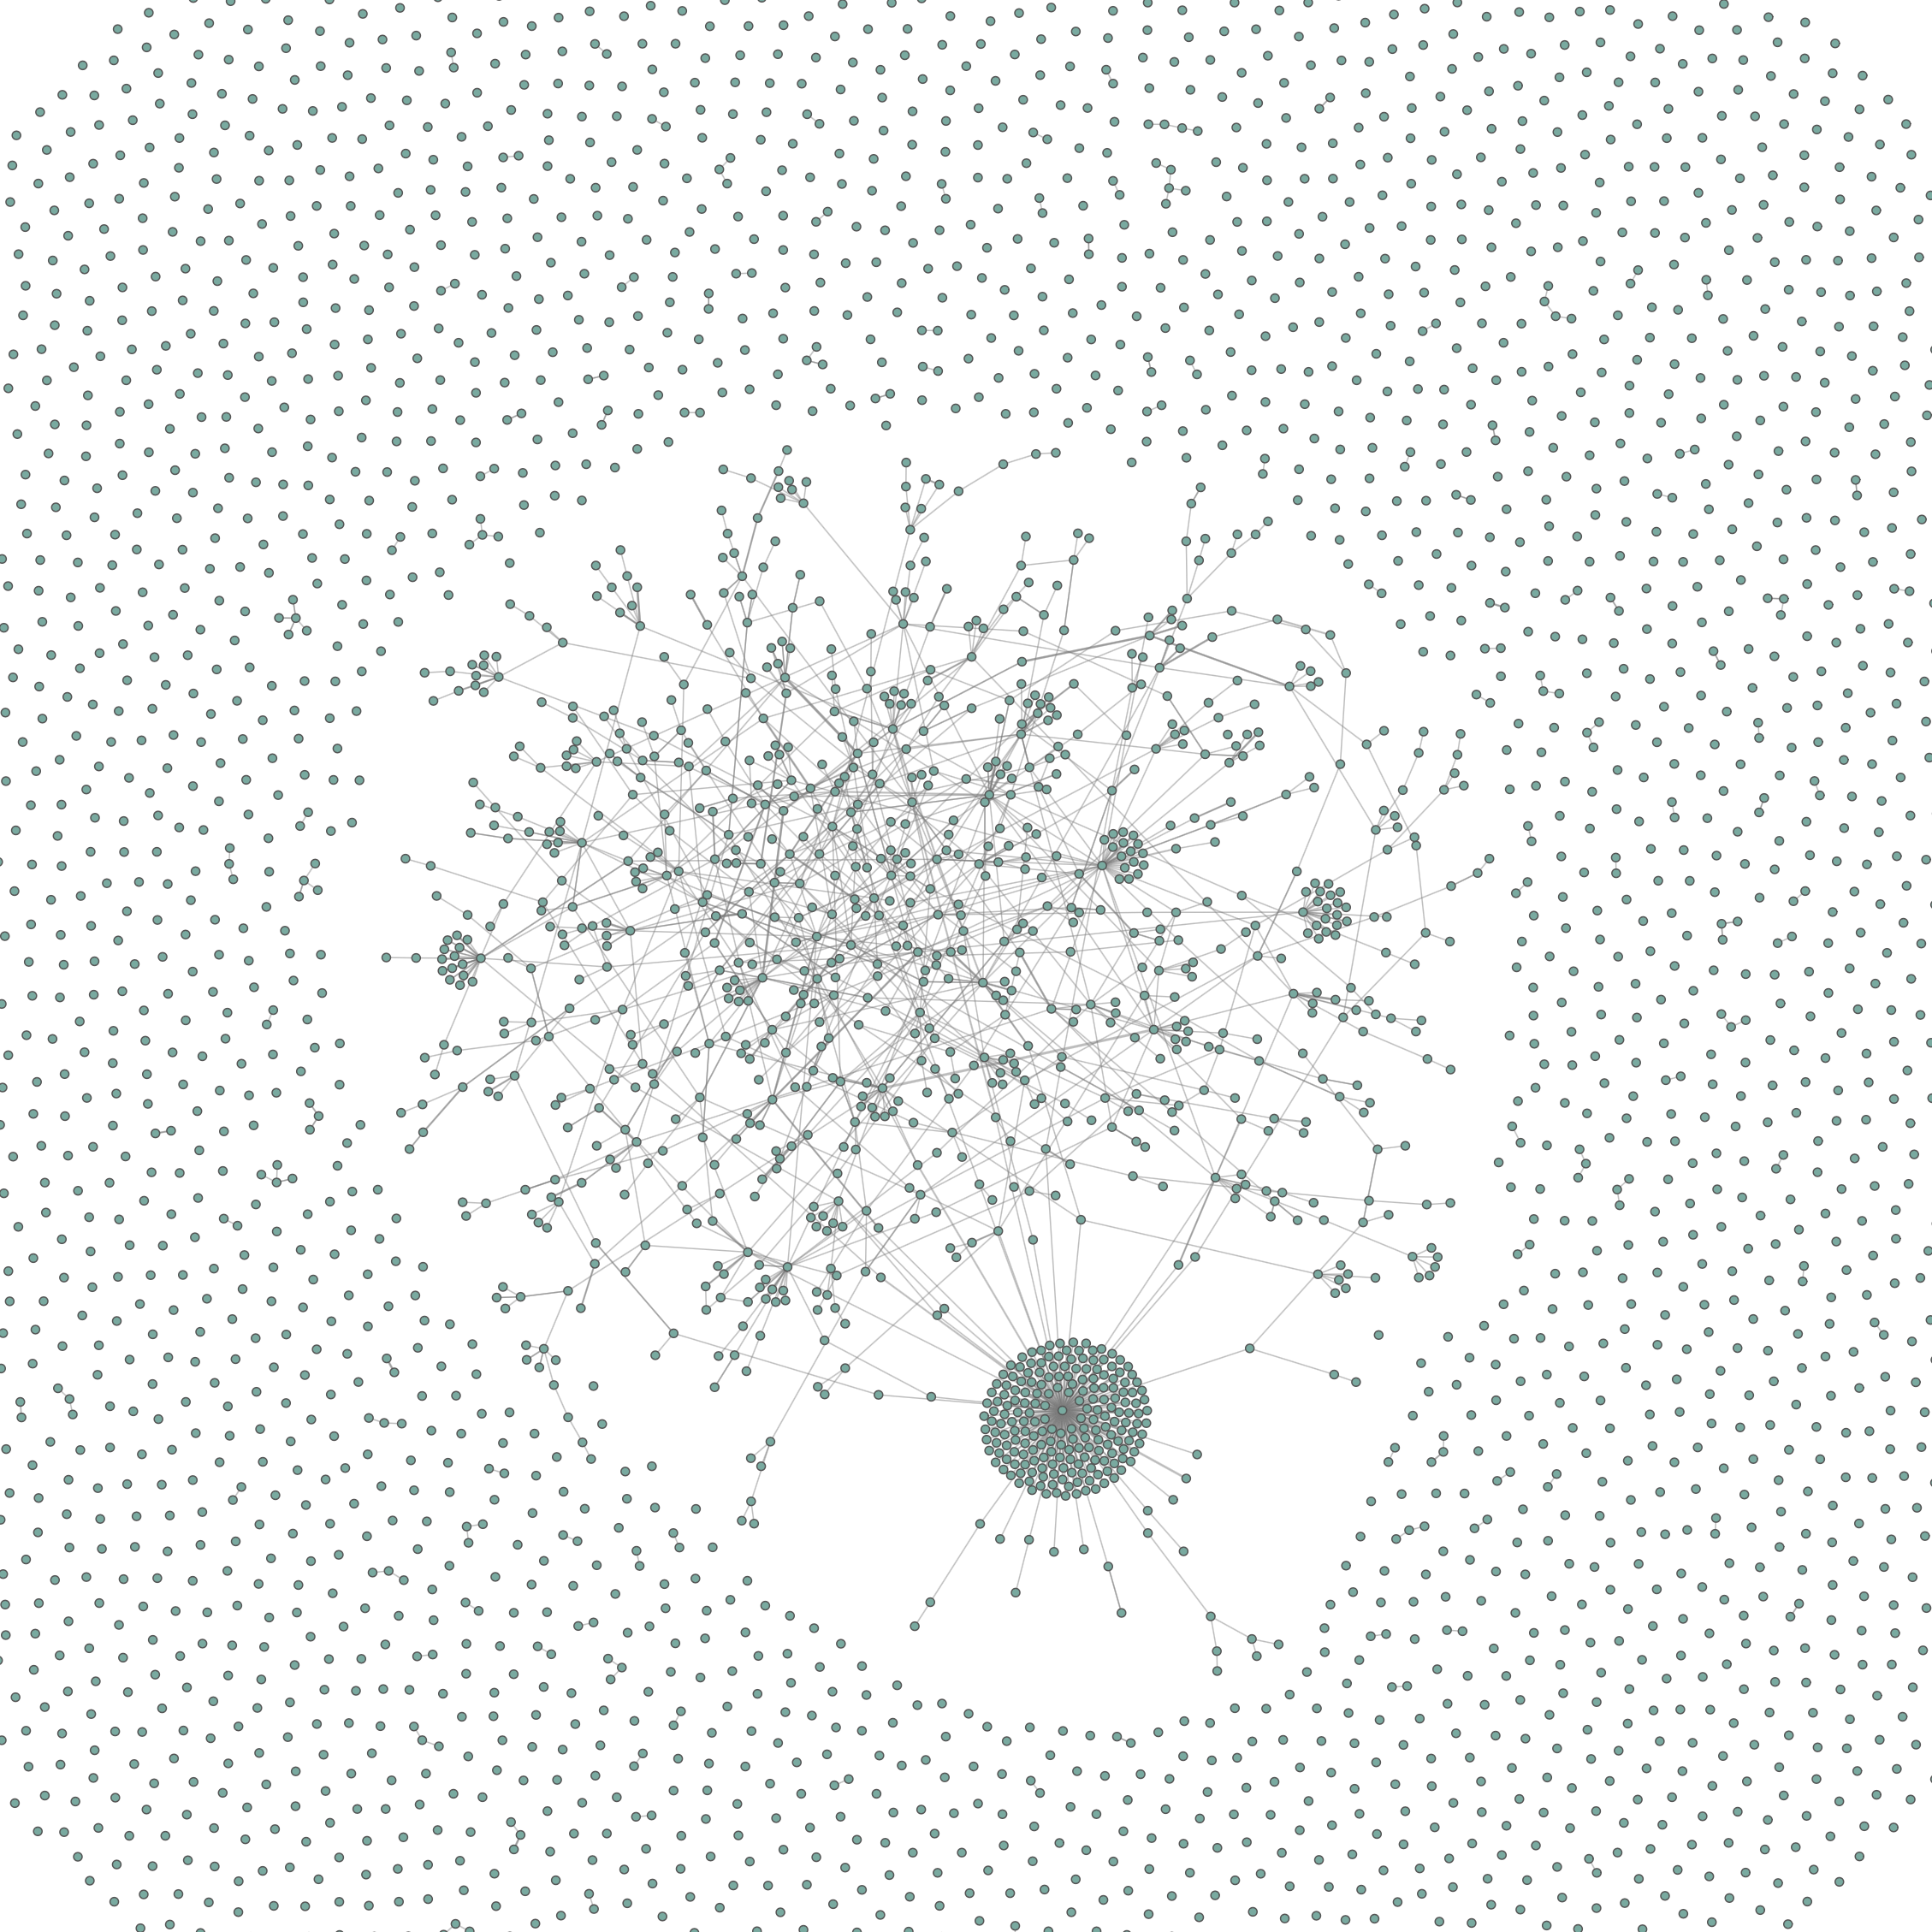

In [27]:
# Visualize a subgraph of redditors directed network

#k = 5000
#sampled_nodes = random.sample(DG.nodes, k)
#sampled_graph = DG.subgraph(sampled_nodes)
#stylized_redditors_network, config = nw.visualize(sampled_graph)
Image(filename = "../plots/redditors_network.png", width = 900, height = 450)

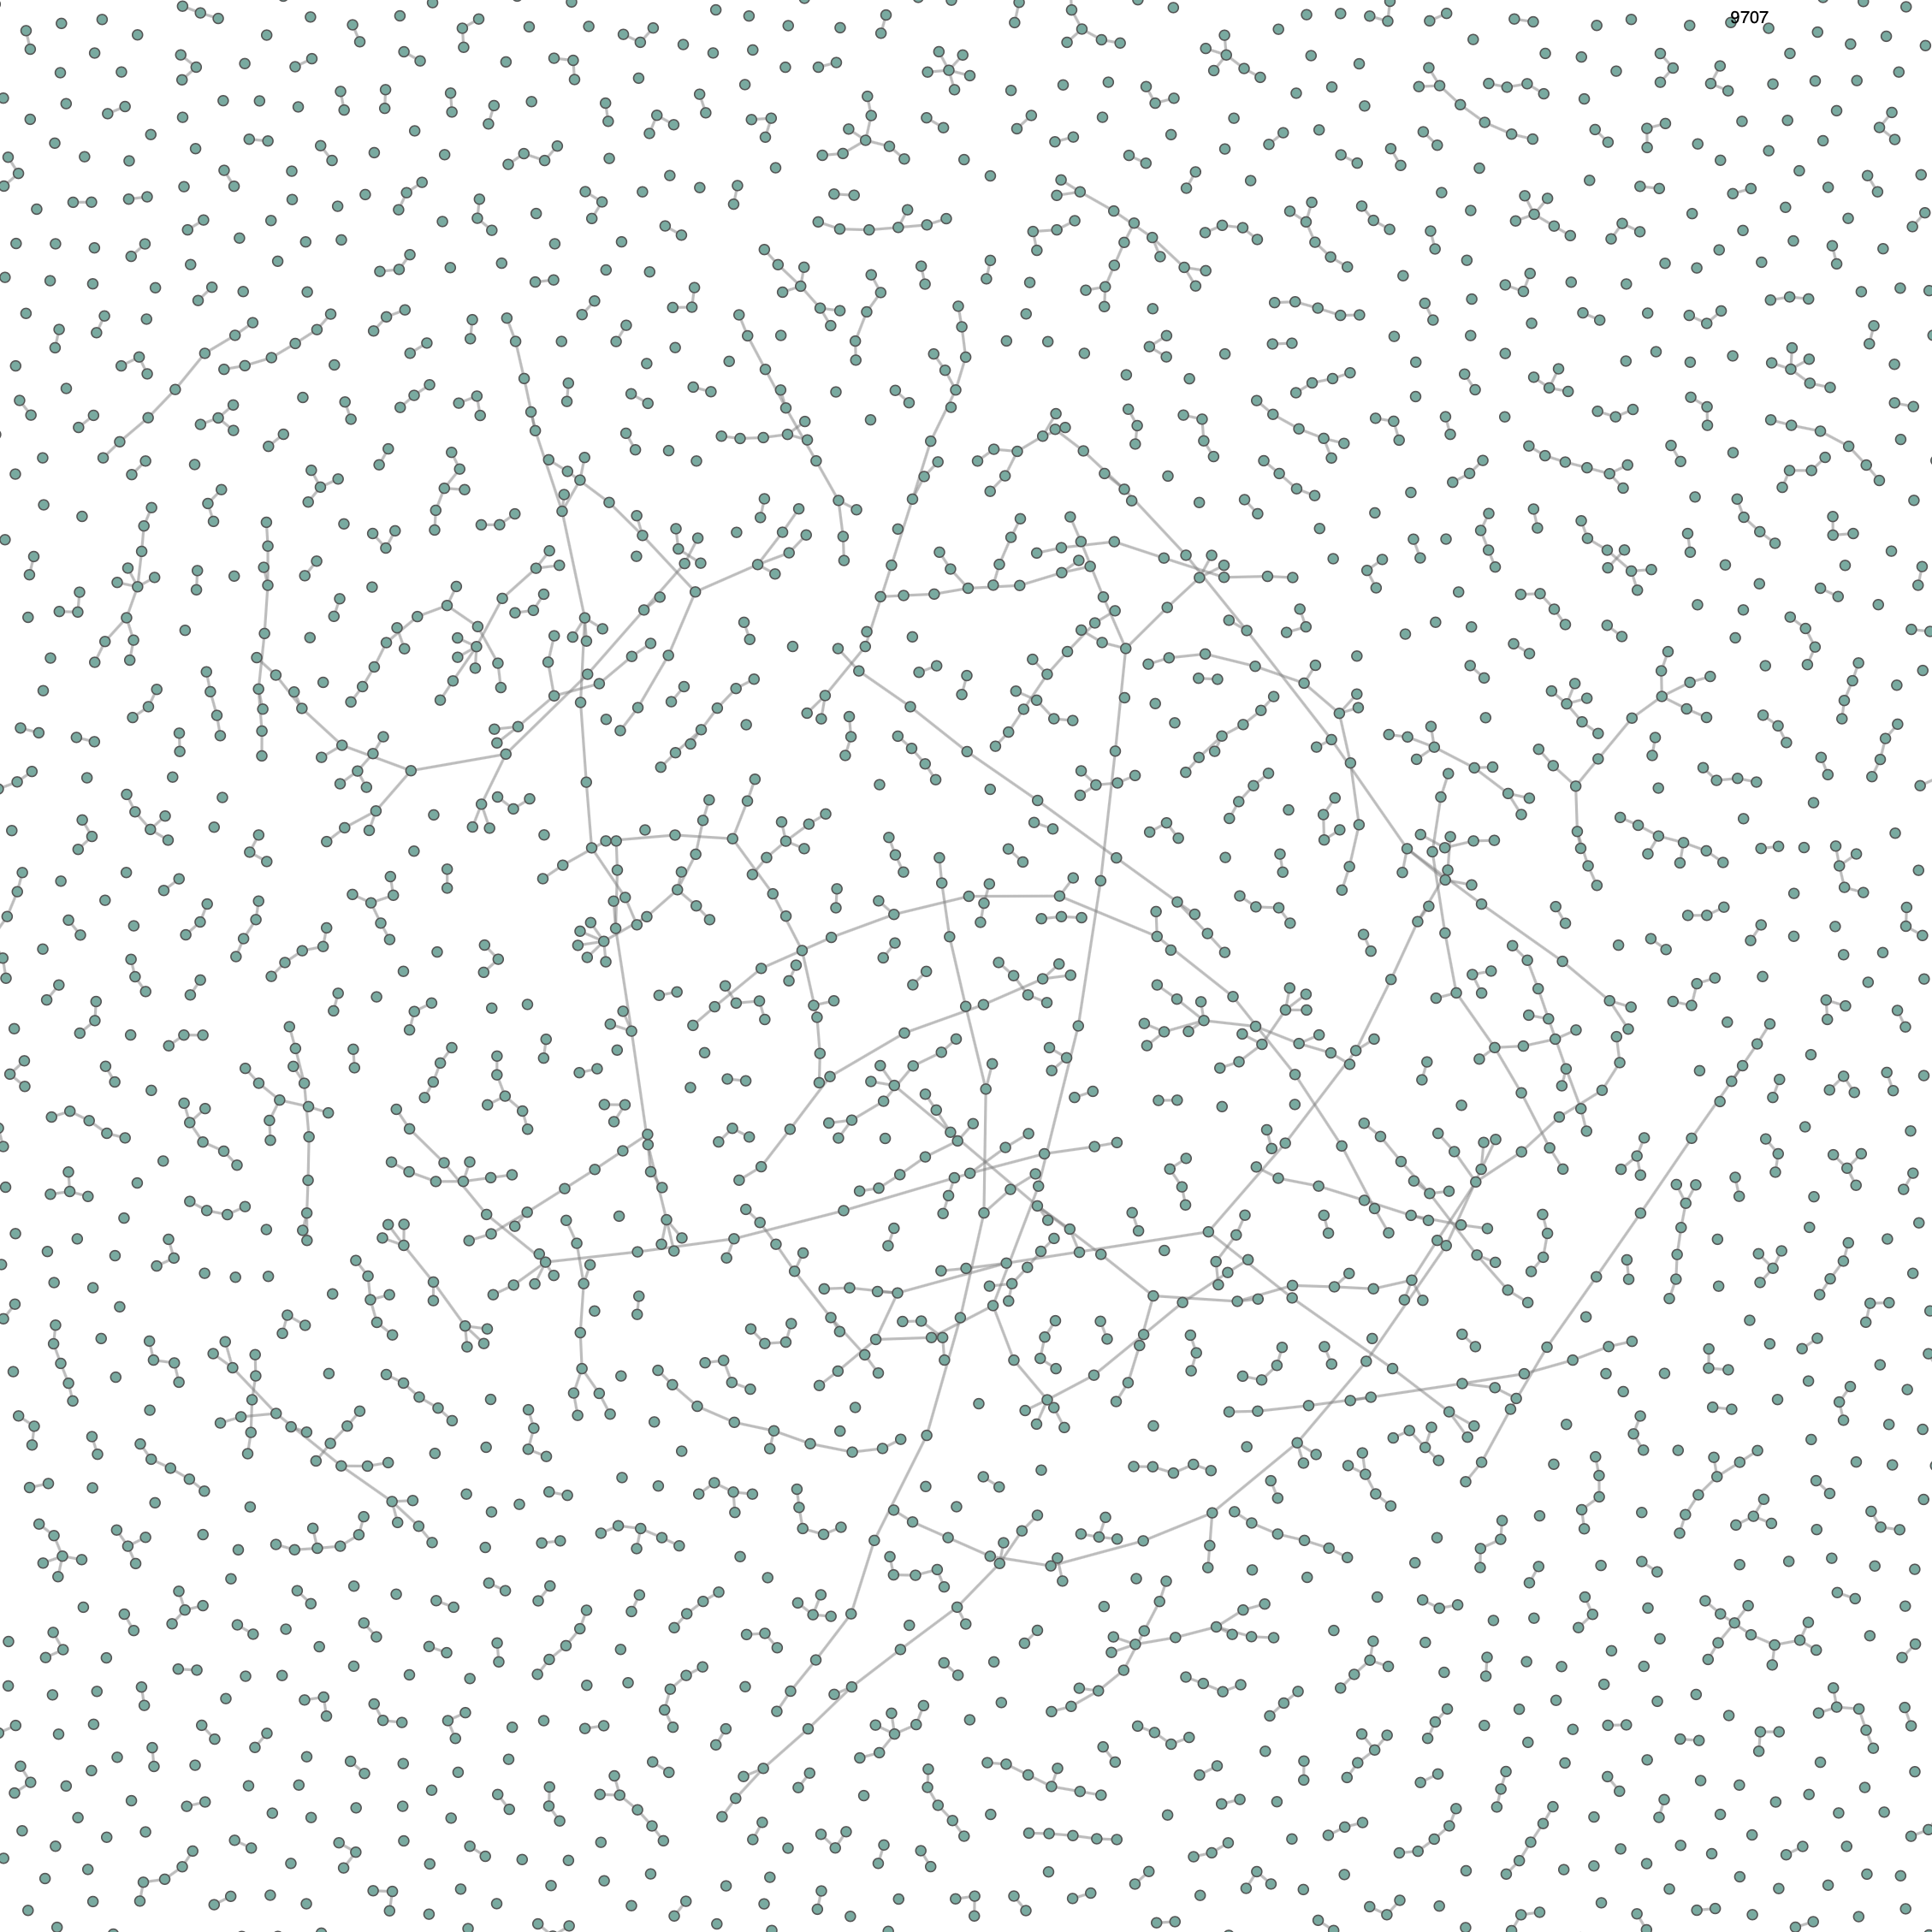

In [28]:
# Visualize a subgraph of the random null directed network

#sampled_nodes = random.sample(null.nodes, k)
#sampled_graph = null.subgraph(sampled_nodes)
#stylized_null_network, config = nw.visualize(sampled_graph)
Image(filename = "../plots/null_network.png", width = 900, height = 450)

We don't see nearly as much clustering in the random network as we do in the redditors network. This fact is also discussed in our conclusion under Part4.2 where the take away is that using the probability parameter p to generate random edges is a gross estimate of how redditors actually interact with eachother. The difference in the plots, specifically in the clusters is probably caused by the various type of redditors and their tendencies to comment on certain post, submitters and even groups of redditors being more active than others. With the random network we only see the average interaction level of the typical redditor and no more.

# Part 4.2 Clustering:
## Compare the clustering coefficient in the Redditors Network and its random counterpart.

>Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.


(2.15) $C_{ı} = \frac{2L_{i}}{k_{i}\left(k_{i}-1\right)}$

In [29]:
# Computes the list and prints a few non-zero values

c_coef = list(nx.clustering(null).values())
#sampls = random.sample([c_coef[i] for i in range(1, N+1) if c_coef[i] > 0], 5)
#print('Randomely selected non-zero clustering coefficient values')
#print(" c_r =", *(f"[{i:.3f}]" for i in sampls))

>Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?

To calculate degree of clustering of the whole network we find the the average clustering coefficient \<k> given by eq. (2.16) below.  
(2.16) $\left< C \right> = \frac{1}{N} \sum_{i=1}^{N} C_{i}$

In [30]:
# Average clustering coefficient for the null network

null_avg_c = np.mean(c_coef)
print(f'<C> of null network = {null_avg_c:.3g}') 

<C> of null network = 7.95e-05


In [31]:
# Simply verifying using the Networkx API's build-in function

#api_null_c = nx.average_clustering(null)
#print(f'<C> of null network using build-in method = {api_null_c:.3g}') 

>Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [32]:
# Average clustering coefficient for the redditors directed network

DG_avg_c = np.mean(list(nx.clustering(DG).values()))
print(f'<C> of redditors network = {DG_avg_c:.3g}') 

<C> of redditors network = 0.0526


We observe a large difference in the degree of clustering between the redditors network and the random null network.  
Several reasons for this difference could be thought of:
 1. Users posting on reddit or submitting to posts all have various backgrounds, specifically considering different political orientation, belief systems w.r.t. stock market analysis and investments which could result in groups of threads with common submitters/posters i.e. various users might have certain tendencies to comment on certain types of posts which in turn could be posted by the same poster.
 2. Reddit is a social network and posters and submitters are not anonymous therefore users might be following other users and posting more frequently to a specific subset of users.
 3. Certain topics especially meme-stocks such as GME, AMC, BB etc. might attract certain groups of redditors and when we condition the entire network of redditors to only return GME specific comments submitted in a single subreddit out of millions of subreddits it is expected that niche groupings of threads containing common submitters are more likely which results in a larger spread in the degree distribution $p_{k}$ of the redditor network but maintains the same average degree $\left<k\right>$ e.g. when we sample some spefic redditors post history some redditors might engage more on particular discussions and some might simply post to submissions that doesn't gain a lot of traction i.e. to smaller threads.
 4. Follow up on degree disitribution.  In this analysis we did not consider the degree distribution of the redditors network. Using a uniform distribution to sample edges in the random network might not capture the actual distribution of closely- and not so closely related redditors and basically averages out on the typical redditor and its attributes.
**Conlusion: Using estimated values to generate random edges between nodes in our null network misses most if not all of the mentioned dynamics above. Dynamics that portray different caracteristics for various redditors which in turn results in closer relations between some redditors and some redditors are more isolated. The random network simply links redditors with no underlying mechanism other than the probability parameter p.**



referrence:
[1] http://networksciencebook.com